In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

plt.rcParams["figure.figsize"] = (12,6)
sns.set_style("whitegrid")

In [2]:
# data loading
df = pd.read_csv("btc_1h_data_2018_to_2025.csv")

df.head()

df.info()
df.describe()
print("Shape: ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70847 entries, 0 to 70846
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open time                     70846 non-null  object 
 1   Open                          70847 non-null  float64
 2   High                          70847 non-null  float64
 3   Low                           70847 non-null  float64
 4   Close                         70847 non-null  float64
 5   Volume                        70847 non-null  float64
 6   Close time                    70846 non-null  object 
 7   Quote asset volume            70847 non-null  float64
 8   Number of trades              70847 non-null  int64  
 9   Taker buy base asset volume   70847 non-null  float64
 10  Taker buy quote asset volume  70847 non-null  float64
 11  Ignore                        70847 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 6.5+ MB
Sha

In [3]:
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')

In [4]:
#valiation check for datatime
df['Open time'] = pd.to_datetime(df['Open time'])
df = df.sort_values('Open time')
print("Date range: ", df['Open time'].min(), " to ", df['Open time'].max())

Date range:  2018-01-01 00:00:00  to  2026-02-04 21:00:00


In [5]:
#missing value check
df.isnull().sum()
df[df['Open time'].isnull()]
df = df.dropna(subset=['Open', 'High', 'Low', 'Close', 'Volume'])
print("Shape after dropping missing values: ", df.shape)

Shape after dropping missing values:  (70847, 12)


In [6]:
#duplicate removal
df = df.drop_duplicates()
#invalid price filtering
df = df[(df[['Open', 'High', 'Low', 'Close', 'Volume']] > 0).all(axis=1)]
print("Shape after removing duplicates and invalid prices: ", df.shape)

Shape after removing duplicates and invalid prices:  (70844, 12)


In [7]:
# Data Visulaization(I choose year of 2025)

In [8]:
df_2025 = df[df['Open time'].dt.year == 2025]
print("2025 data shape: ", df_2025.shape)
len(df_2025)

2025 data shape:  (8760, 12)


8760

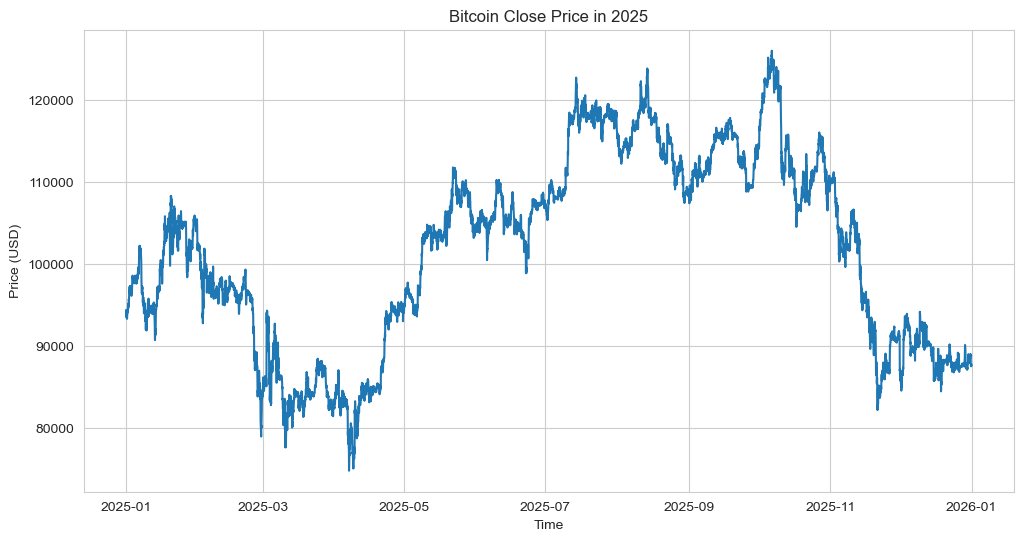

In [9]:
# Time series price behaviour

plt.plot(df_2025['Open time'], df_2025['Close'])
plt.title("Bitcoin Close Price in 2025")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.show()

C:\Users\mayth\AppData\Local\Temp\ipykernel_15096\294073124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['Price_Range'] = df_2025['High'] - df_2025['Low']


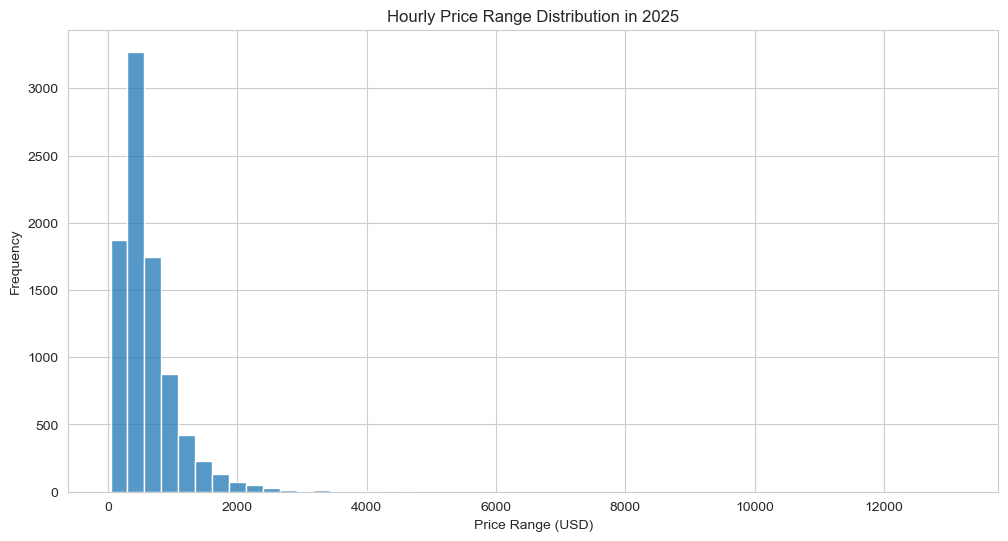

In [10]:
# Price Chaging Distribution

df_2025['Price_Range'] = df_2025['High'] - df_2025['Low']
sns.histplot(df_2025['Price_Range'], bins=50)
plt.title("Hourly Price Range Distribution in 2025")
plt.xlabel("Price Range (USD)")
plt.ylabel("Frequency")
plt.show()

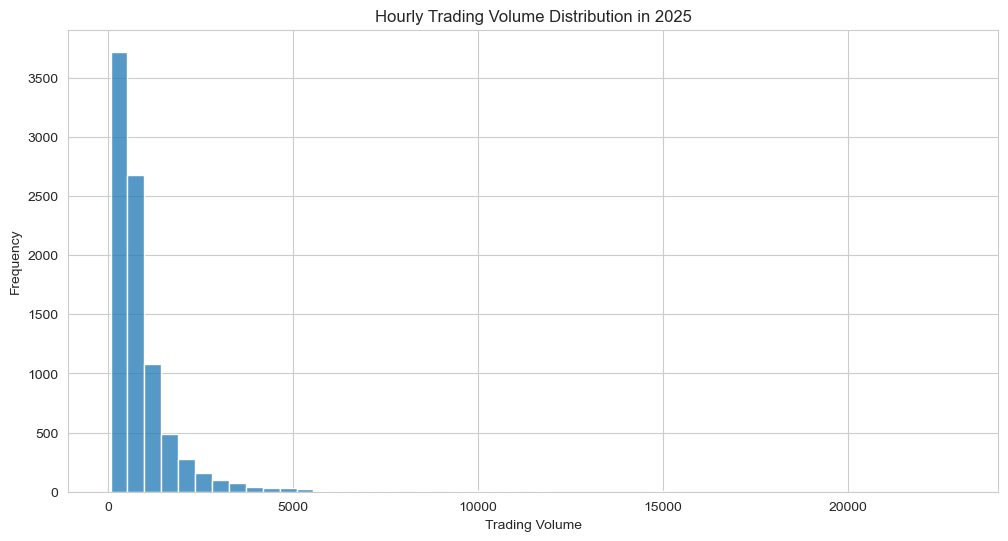

In [11]:
# Trading volume distribution

sns.histplot(df_2025['Volume'], bins=50)
plt.title("Hourly Trading Volume Distribution in 2025")
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.show()

C:\Users\mayth\AppData\Local\Temp\ipykernel_15096\370922432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['Candle_Color'] = np.where(df_2025['Close'] >= df_2025['Open'], 'Green(UP)', 'Red(DOWN)')


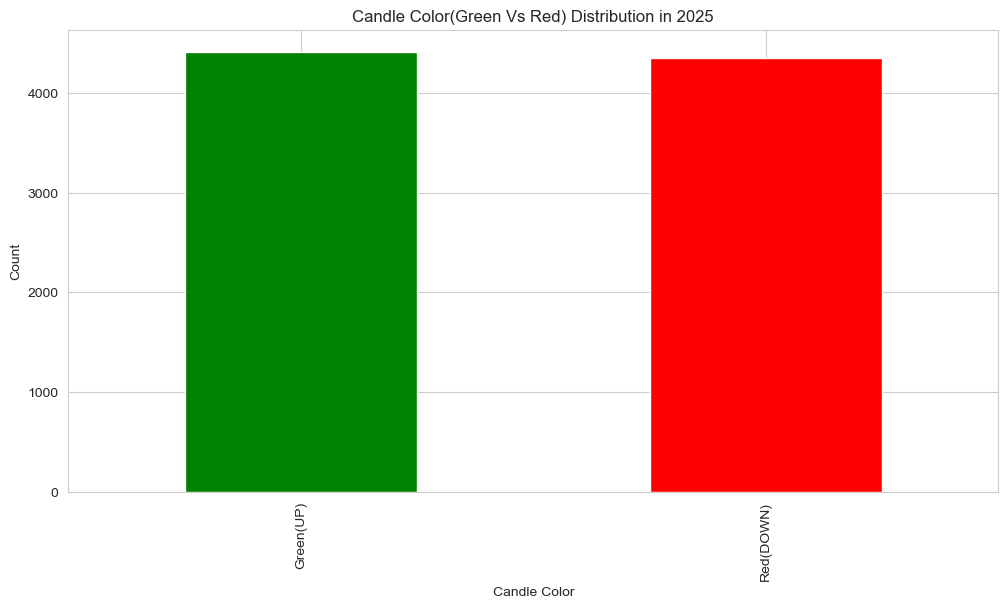

In [12]:
#Trend direction distribution(Green/Red candles)

df_2025['Candle_Color'] = np.where(df_2025['Close'] >= df_2025['Open'], 'Green(UP)', 'Red(DOWN)')
df_2025['Candle_Color'].value_counts().plot(kind='bar', color=['green', 'red'])
# counts, bin_edges = np.histogram(df_2025['Candle_Color'].map({'Green(UP)':1, 'Red(DOWN)':0}))
# print(counts)
# print(bin_edges)
plt.title("Candle Color(Green Vs Red) Distribution in 2025")
plt.xlabel("Candle Color")
plt.ylabel("Count")
plt.show()

C:\Users\mayth\AppData\Local\Temp\ipykernel_15096\2746518365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['size'] = abs(df_2025['Close'] - df_2025['Open'])


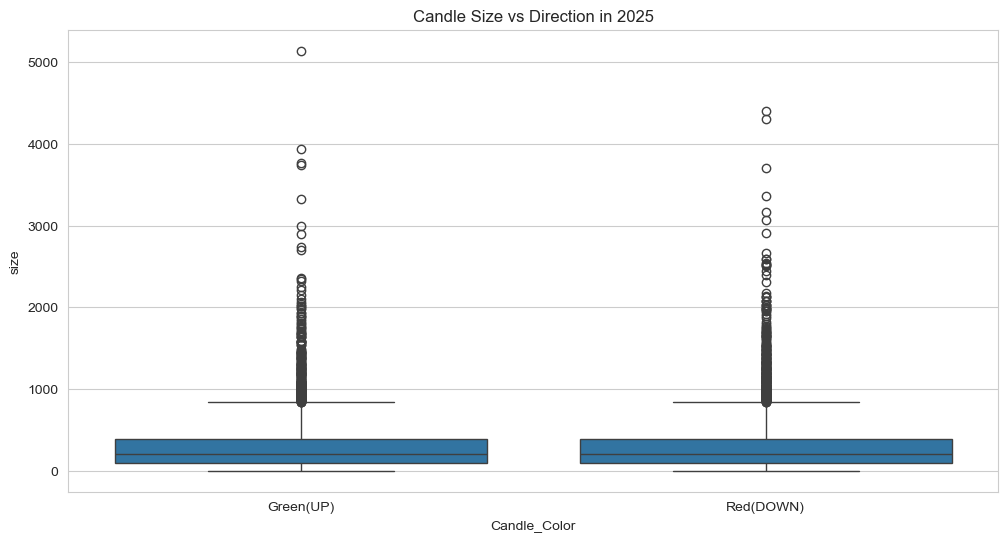

In [13]:
#Feature vs Direction

df_2025['size'] = abs(df_2025['Close'] - df_2025['Open'])
sns.boxplot(x='Candle_Color', y='size', data=df_2025)
plt.title("Candle Size vs Direction in 2025")
plt.show()

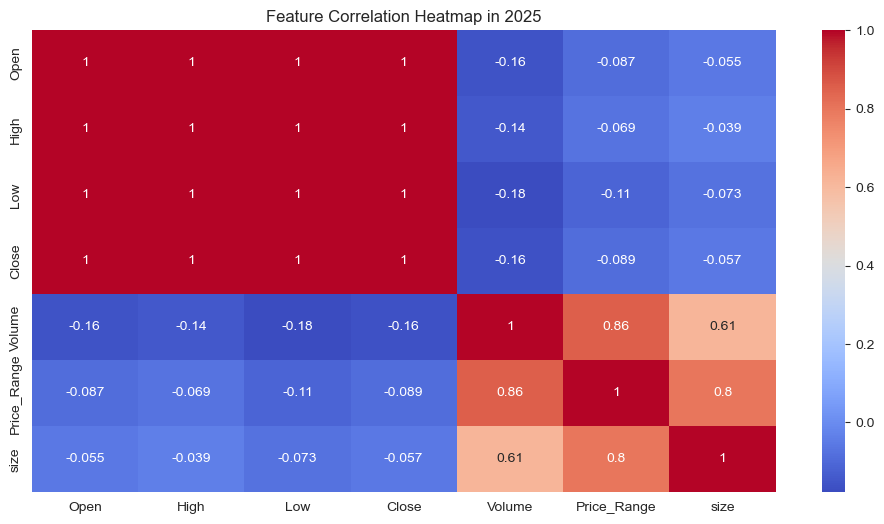

In [14]:
#feature relationship(correlation heatmap)

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Range', 'size']
corr = df_2025[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap in 2025")
plt.show()

In [15]:
# Data Transformation(Feature Engineering)

df_2025['return'] = (df_2025['Close'] - df_2025['Open']) / df_2025['Open']
df_2025['log_return'] = np.log(df_2025['Close'] / df_2025['Open'])

df_2025[['Price_Range', 'size', 'return', 'log_return']].describe()

C:\Users\mayth\AppData\Local\Temp\ipykernel_15096\297540809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['return'] = (df_2025['Close'] - df_2025['Open']) / df_2025['Open']
C:\Users\mayth\AppData\Local\Temp\ipykernel_15096\297540809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['log_return'] = np.log(df_2025['Close'] / df_2025['Open'])


,Price_Range,size,return,log_return
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,620.011421,304.980894,0.000004,-0.000007
std,489.040409,348.846852,0.004748,0.004750
min,41.580000,0.010000,-0.048955,-0.050194
25%,327.430000,90.920000,-0.001944,-0.001946
50%,491.690000,202.965000,0.000026,0.000026
75%,765.760000,389.775000,0.002057,0.002054
max,13112.690000,5142.300000,0.050269,0.049047


In [16]:
#Feature Selection and Reduction

#For direction
le = LabelEncoder()
y = le.fit_transform(df_2025['Candle_Color'])
X = df_2025[['Volume', 'Price_Range', 'size', 'return', 'log_return']]

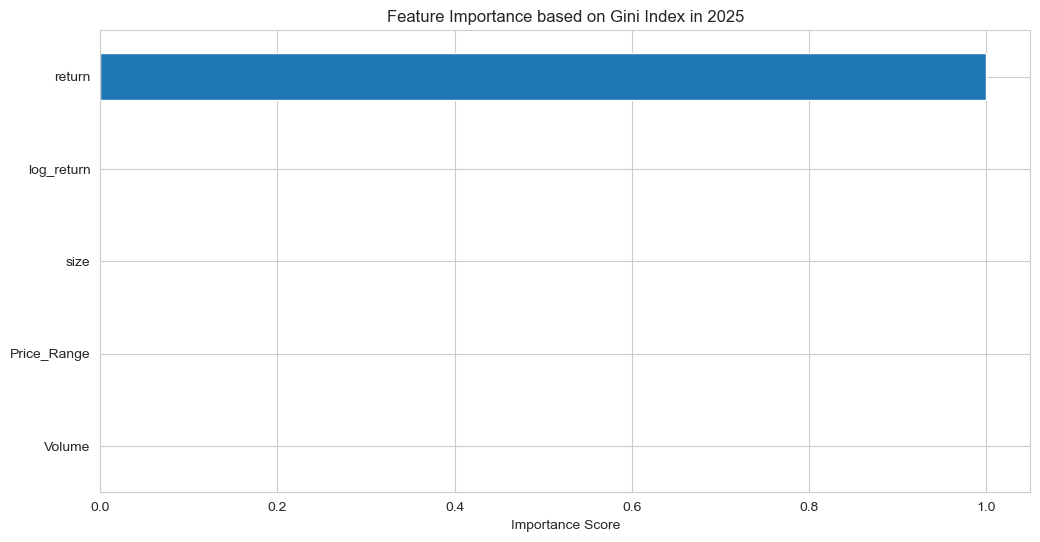

In [17]:
# Gini based feature importance

dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X, y)
importances = pd.Series(dt.feature_importances_, index = X.columns)
importances.sort_values(ascending = False)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance based on Gini Index in 2025")
plt.xlabel("Importance Score")
plt.show()